In [65]:
import pandas as pd
data= pd.read_csv("/content/bank-additional-full.csv")

In [66]:
data #loading data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [67]:
data.duplicated().sum() #checking for duplicate entries

np.int64(12)

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.duplicated().sum() #removing duplicates and confirming

np.int64(0)

In [70]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [71]:
data.isnull().mean()*100 #checking for nan values, none exists

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0


In [72]:
data.select_dtypes("number").skew() #checking for skewness

,0
age,0.784560
duration,3.262808
campaign,4.762044
pdays,-4.921386
previous,3.831396
emp.var.rate,-0.724061
cons.price.idx,-0.230853
cons.conf.idx,0.302876
euribor3m,-0.709194
nr.employed,-1.044317


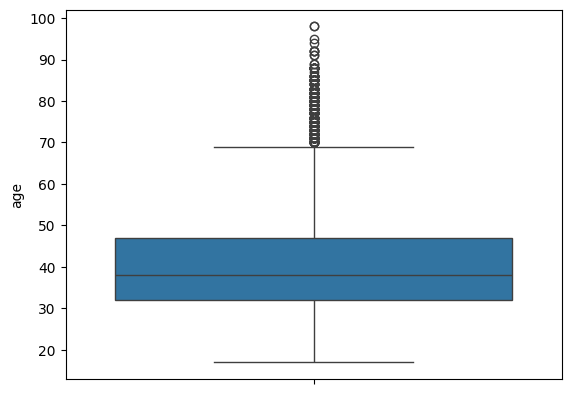

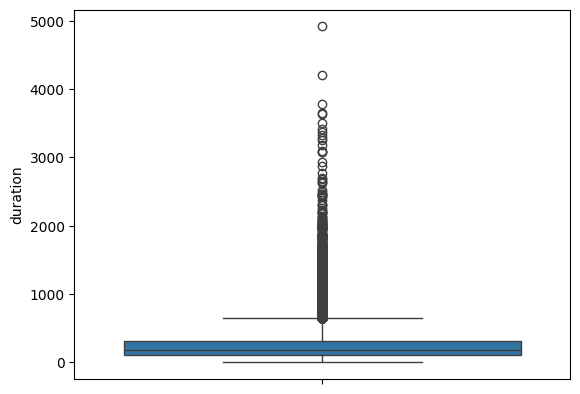

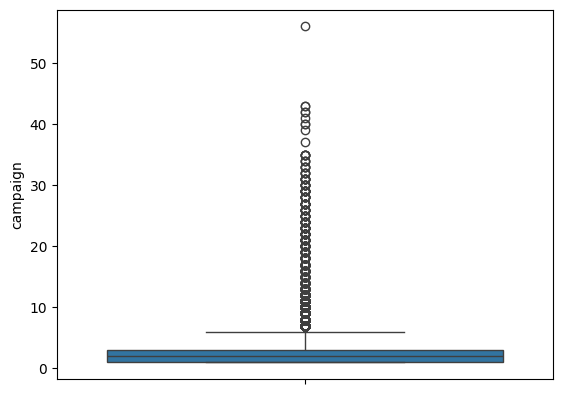

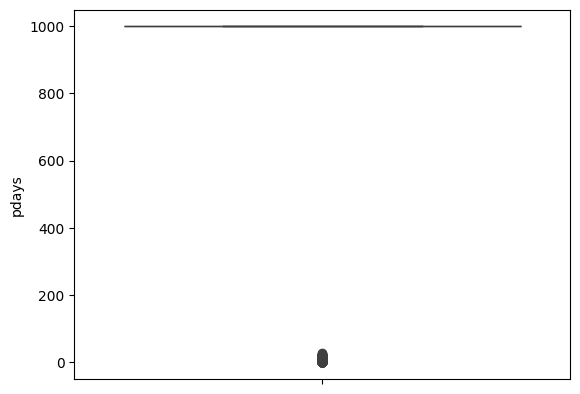

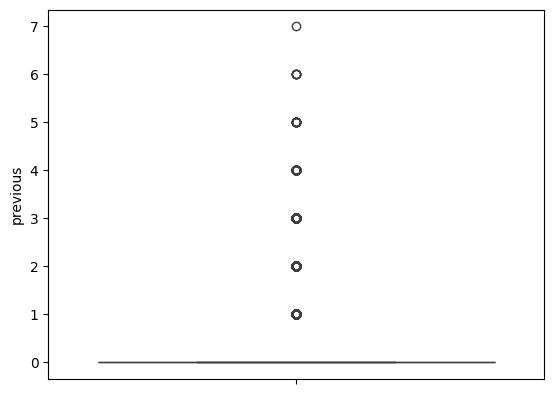

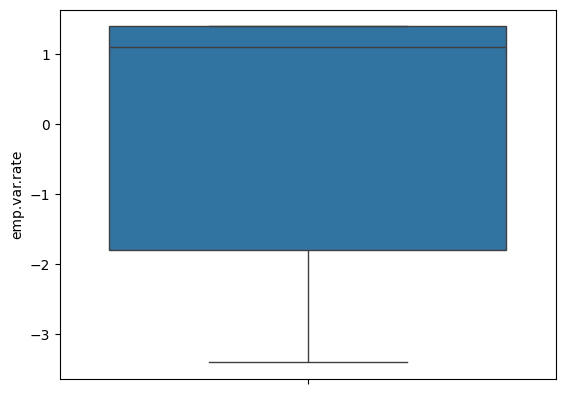

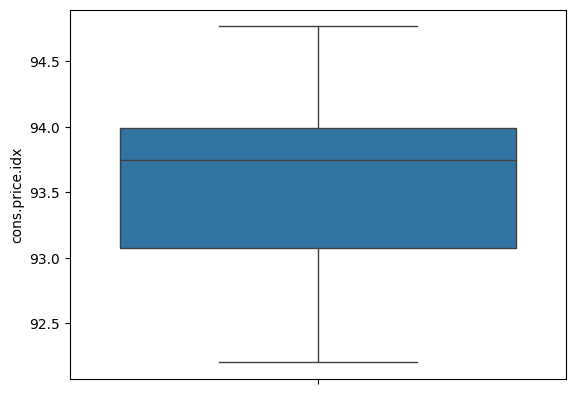

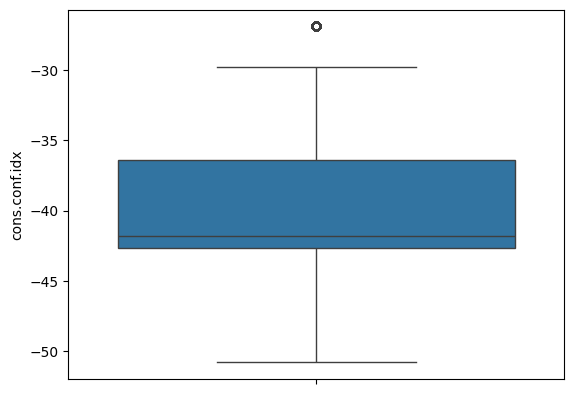

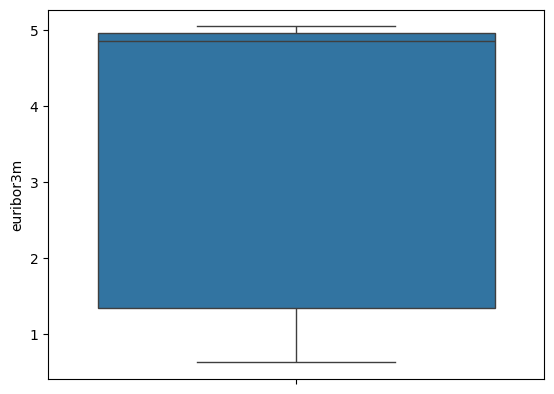

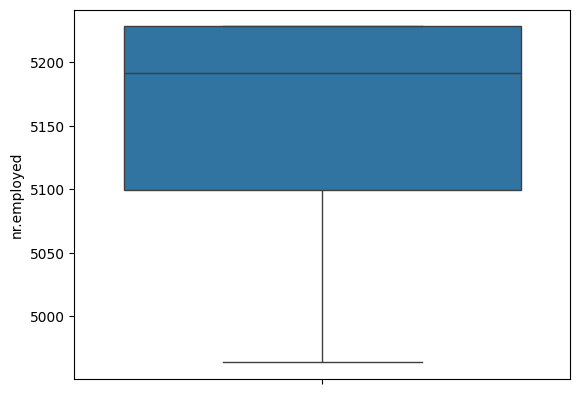

In [73]:
import seaborn as sns #plotting boxplot and checking data
import matplotlib.pyplot as plt
num_cols = data.select_dtypes("number")
for i in num_cols:
  sns.boxplot(data[i])
  plt.show()

In [74]:
#reducing skewness
# Create a copy to preserve original data
data_transformed = data.copy()

In [75]:
# Copy dataset
data_transformed = data.copy()

import numpy as np

# Transform positively skewed features
data_transformed['age'] = np.sqrt(data_transformed['age'])
data_transformed['duration'] = np.log1p(data_transformed['duration'])
data_transformed['campaign'] = np.sqrt(data_transformed['campaign'])
data_transformed['previous'] = np.sqrt(data_transformed['previous'])

data_transformed['pdays_contacted'] = (data_transformed['pdays'] != 999).astype(int)
data_transformed.drop('pdays', axis=1, inplace=True)

# Final skewness check (ONLY continuous features)
data_transformed[
    ['age','duration','campaign','previous',
     'emp.var.rate','cons.price.idx','cons.conf.idx',
     'euribor3m','nr.employed']
].skew()


,0
age,0.440530
duration,-0.421499
campaign,2.168417
previous,2.388239
emp.var.rate,-0.724061
cons.price.idx,-0.230853
cons.conf.idx,0.302876
euribor3m,-0.709194
nr.employed,-1.044317


In [76]:
data_transformed.select_dtypes("number").skew()

,0
age,0.440530
duration,-0.421499
campaign,2.168417
previous,2.388239
emp.var.rate,-0.724061
cons.price.idx,-0.230853
cons.conf.idx,0.302876
euribor3m,-0.709194
nr.employed,-1.044317
pdays_contacted,4.921264


In [77]:
#Separate Features & Target
X = data_transformed.drop('y', axis=1)
y = data_transformed['y']

In [78]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [79]:
#ENCODING CAT FEATURES
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [81]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [82]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),

    "KNN": KNeighborsClassifier(n_neighbors=7),

    "SVM": SVC(kernel='linear'),

    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),

    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),

    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
}


In [84]:
results = []

for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })


In [85]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1-score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-score
7,Gradient Boosting,0.916464,0.655039,0.546336,0.595770
5,Bagging,0.912458,0.625455,0.556034,0.588705
0,Logistic Regression,0.910393,0.644817,0.455819,0.534091
4,Random Forest,0.911000,0.659574,0.434267,0.523717
3,Decision Tree,0.888902,0.506967,0.509698,0.508329
6,AdaBoost,0.904201,0.606759,0.425647,0.500317
2,SVM,0.908572,0.673956,0.365302,0.473795
1,KNN,0.903958,0.623423,0.372845,0.466622


In [86]:
#Gradient Boosting Classifier emerged as the best-performing model
#highest F1-score
#good balance between Precision and Recall